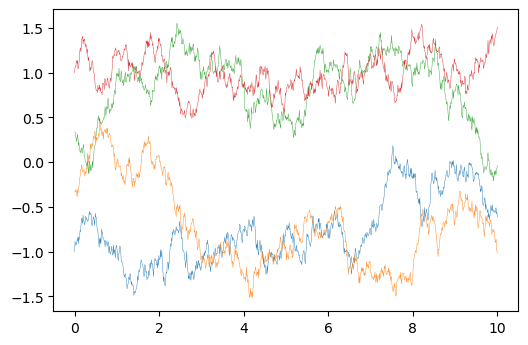

In [5]:
import numpy as np
import matplotlib.pyplot as plt


## HERE PARAMETERS
dt = 1e-4
sig = 0.5 ##noise strength
r = 1

def em_step(t, y, dt, f, G): ##same as in example
    
    DW = np.random.normal(size=len(y))    
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)

def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):            
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        y_list[i,:] = y
        
    return y_list


##HERE NORMAL FUNCTION

def f(t,y): 
    return r*y[0]-y[0]**3



##HERE NOISE FUNCTION (usually just squareroot of diff coefficient)

def G(t,y): 
    return sig

y0 = np.linspace(-1,1,4) ##plot 4 trajectories
t = np.linspace(0,10,1000)

plt.figure(dpi=100)
for val in y0:
    vall = np.array([val])
    y = eulermaruyama(t, vall, dt, f, G)
    plt.plot(t, y,lw=0.3)